In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_gate_map
import qiskit_aer.noise as noise

from main import *

In [32]:
% reload_ext autoreload
% autoreload 2

secret = np.array([1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=np.byte)

In [26]:
oracle = ClassicalOracle(secret)
solver = ClassicalSolver(oracle)
solution = solver.solve()

print("secret string:".ljust(20, " "), secret)
print("classical solution:".ljust(20, " "), solution)
print("match:".ljust(20, " "), np.array_equal(solution, secret))
print("# of queries:".ljust(20, " "), oracle.query_count)

secret string:       [1 0 1 0 0 0 1 1 1]
classical solution:  [1 0 1 0 0 0 1 1 1]
match:               True
# of queries:        9


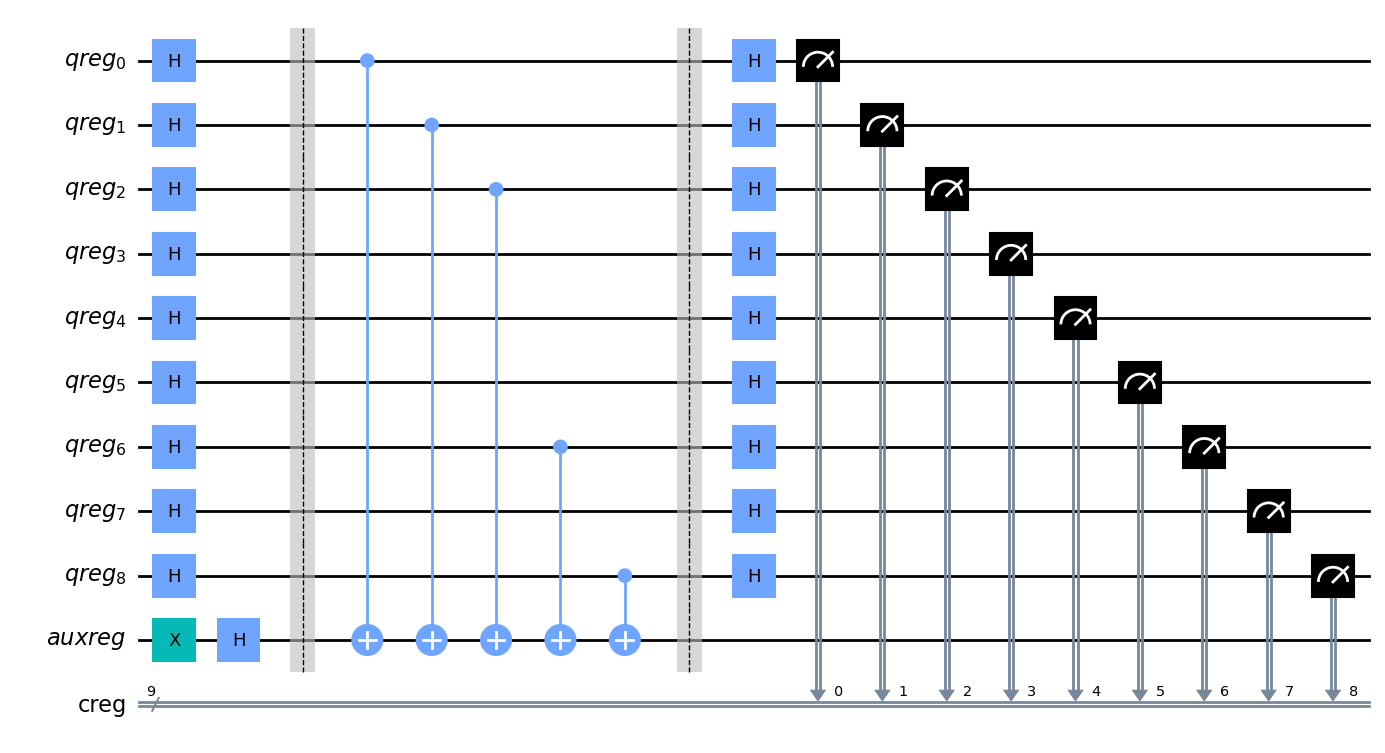

In [27]:
qoracle = QuantumOracle(secret)
builder = BVAlgBuilder(qoracle)
builder.create_circuit()

builder.circuit.draw(output="mpl")

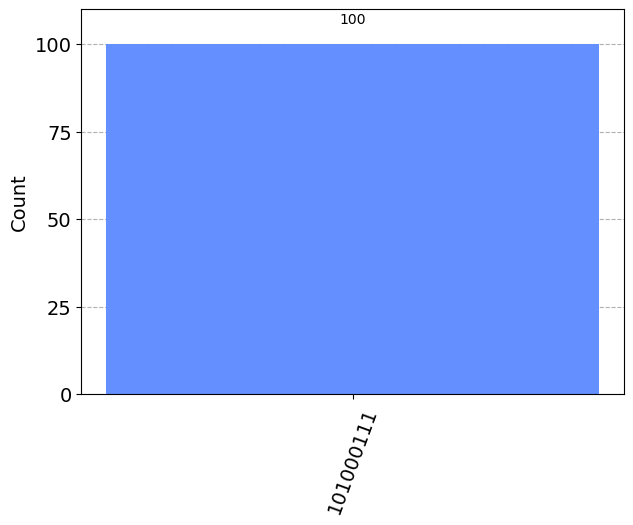

In [31]:
job = execute(builder.circuit, Aer.get_backend("qasm_simulator"), shots=100)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
                              pauli_error, depolarizing_error, thermal_relaxation_error)

# Error probabilities
prob_1 = 0.2  # 1-qubit gate
prob_2 = 0.2  # 2-qubit gate

p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X', p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ["h", "z", "x"])
noise_model.add_all_qubit_quantum_error(error_2, ["cx"])

noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
# noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# transpiled_qc = transpile(qc, qasm_simulator)
# Execute circuit and show results
ex = execute(
    qc,
    Aer.get_backend("qasm_simulator"),
    basis_gates=basis_gates,
    noise_model=noise_model,
    shots=2000
)
counts = ex.result().get_counts(qc)

plot_histogram(counts)

In [ ]:
len(counts)

In [ ]:
import matplotlib.pyplot as plt

# creating the dataset
courses = list(counts.keys())
values = list(counts.values())

# fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color='maroon')

plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=False)  # labels along the bottom edge are off

plt.show()

In [ ]:
simulator = QasmSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count for 00 and 11 are:", counts)

In [ ]:
# !pip install qiskit-ibm-runtime

# from qiskit_ibm_runtime import QiskitRuntimeService

# QiskitRuntimeService.save_account(channel="ibm_quantum", token="...")
# service = QiskitRuntimeService()

In [ ]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy

# service = IBMQ.enable_account("")
print(service.backends())
backend = least_busy(service.backends(filters=lambda x: x.configuration().n_qubits >= (n + 1) and
                                                        not x.configuration().simulator and x.status().operational == True))
print("least busy backend: ", backend)

In [ ]:
transpiled_bv_circuit = transpile(qc, backend)

In [ ]:


shots = 1024
job = backend.run(transpiled_bv_circuit, shots=shots)

from qiskit.tools.monitor import job_monitor

job_monitor(job, interval=2)

In [ ]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
from qiskit.visualization import plot_error_map, plot_circuit_layout, plot_gate_map

display(plot_error_map(backend))
display(plot_circuit_layout(transpiled_bv_circuit, backend))
display(plot_gate_map(backend))